Average score in math (G3): 10.42
Number of students scoring above 15 in G3: 40
Correlation between study time and final grade (G3): 0.10

Average final grade (G3) by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


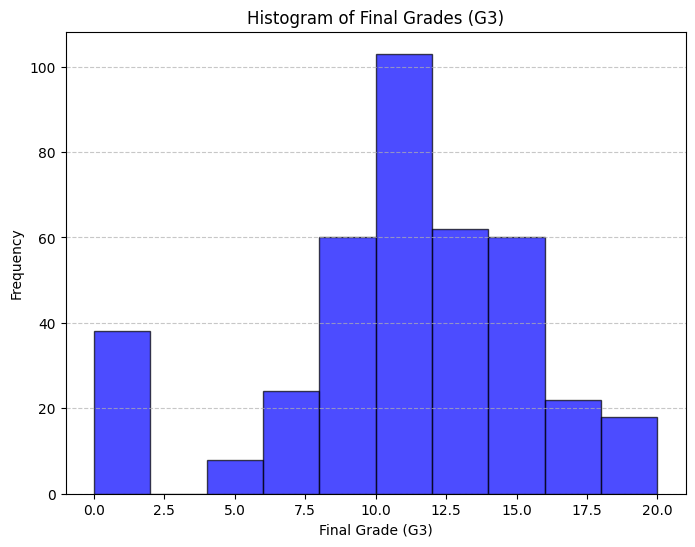

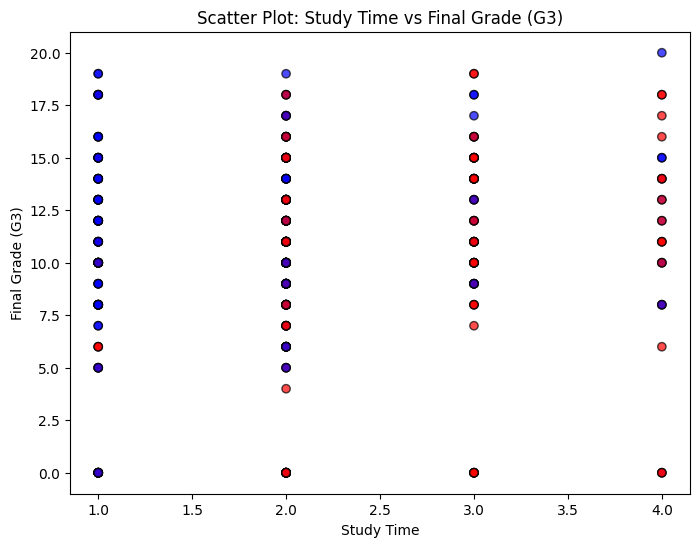

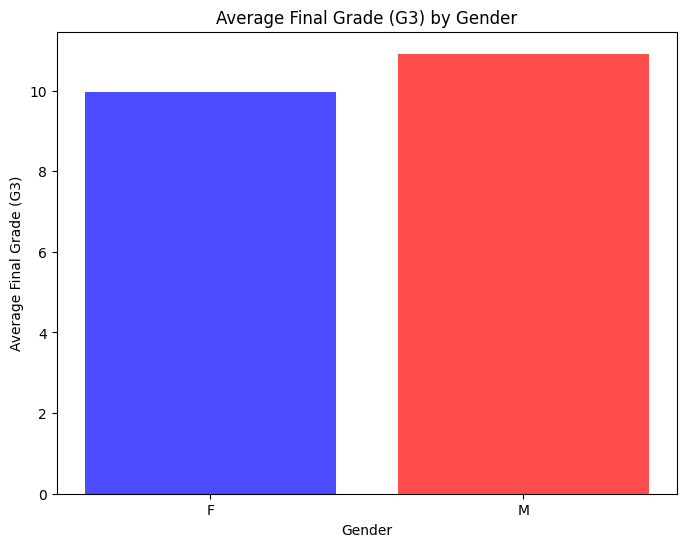

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using basic pandas operations
file_path = "C:\\datascience\\student-mat.csv"
data = pd.read_csv(file_path, delimiter=";")

# Data Cleaning
# Remove duplicate entries using basic pandas operation
data = data.drop_duplicates()
# Handle missing values by replacing them with the median of each column
data = data.apply(lambda x: x.fillna(x.median()) if x.dtype in [np.int64, np.float64] else x)

# Data Analysis
# Calculate the average score manually
average_score = data["G3"].sum() / len(data)
print(f"Average score in math (G3): {average_score:.2f}")

# Count students scoring above 15 manually
students_above_15 = len(data[data["G3"] > 15])
print(f"Number of students scoring above 15 in G3: {students_above_15}")

# Compute correlation using pandas only
mean_studytime = data["studytime"].mean()
mean_G3 = data["G3"].mean()
std_studytime = data["studytime"].std()
std_G3 = data["G3"].std()
covariance = ((data["studytime"] - mean_studytime) * (data["G3"] - mean_G3)).sum() / (len(data) - 1)
correlation = covariance / (std_studytime * std_G3)
print(f"Correlation between study time and final grade (G3): {correlation:.2f}")

# Compute average by gender using basic pandas operations
average_by_gender = data.groupby("sex")["G3"].sum() / data.groupby("sex")["G3"].count()
print("\nAverage final grade (G3) by gender:")
print(average_by_gender)

# Data Visualization
# Histogram of final grades
plt.figure(figsize=(8, 6))
plt.hist(data["G3"], bins=10, color="blue", edgecolor='black', alpha=0.7)
plt.title("Histogram of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot: Study time vs Final Grade
plt.figure(figsize=(8, 6))
colors = {'M': 'blue', 'F': 'red'}
plt.scatter(data["studytime"], data["G3"], c=data["sex"].map(colors), alpha=0.7, edgecolors='black')
plt.title("Scatter Plot: Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

# Bar chart: Average final grade by gender
plt.figure(figsize=(8, 6))
plt.bar(average_by_gender.index, average_by_gender.values, color=["blue", "red"], alpha=0.7)
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.show()
